# O problema
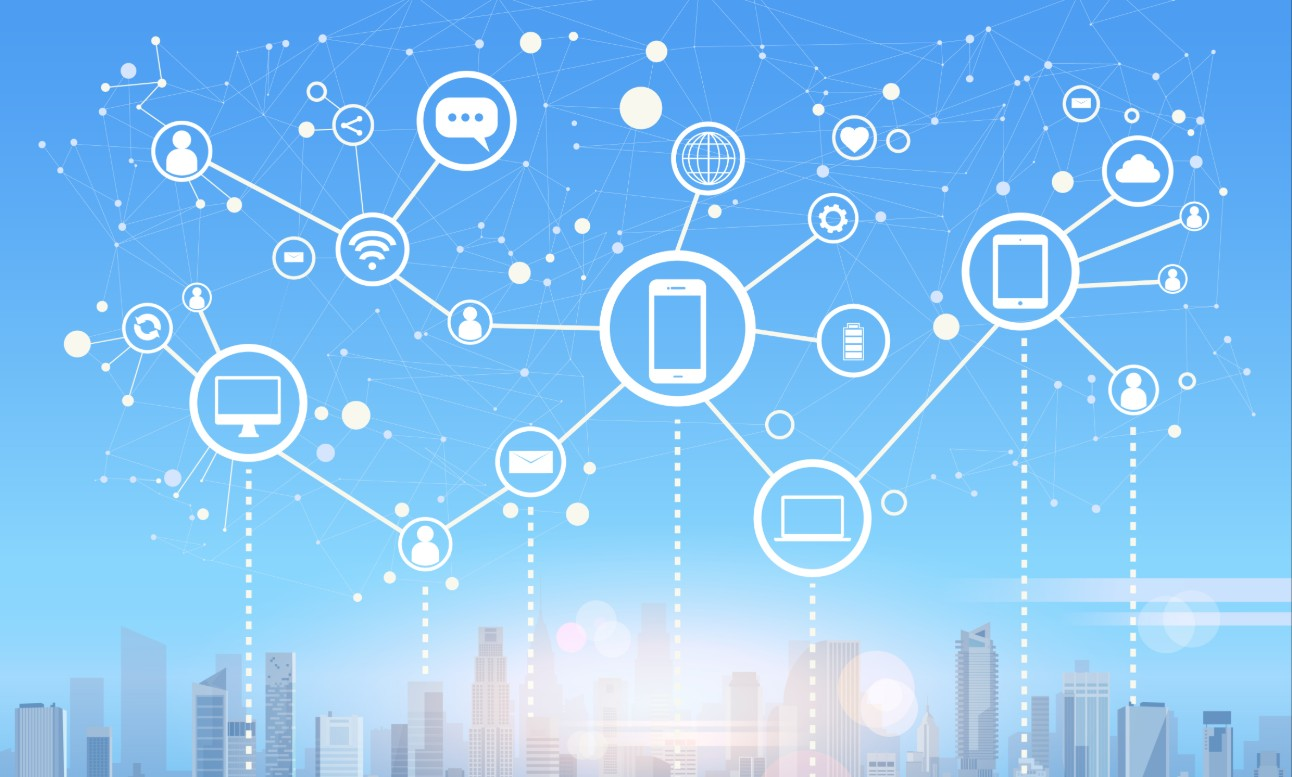

A empresa de telecomunicações  TelecomCell(empresa fake) quer entender o porque da perda de alguns clientes nos últimos meses , fomos contratados para investigar esse fenômeno, e prever quando um cliente irá se retirar ou não.



# O que é o Churn


A grosso modo o churn é um número que indica quantos clientes cancelaram seus serviços/produto em um determinado tempo.
Para uma empresa aumentar sua base de clientes é necessario que o número de novos clientes seja maior que sua churn rate(taxa de evasão de clientes)

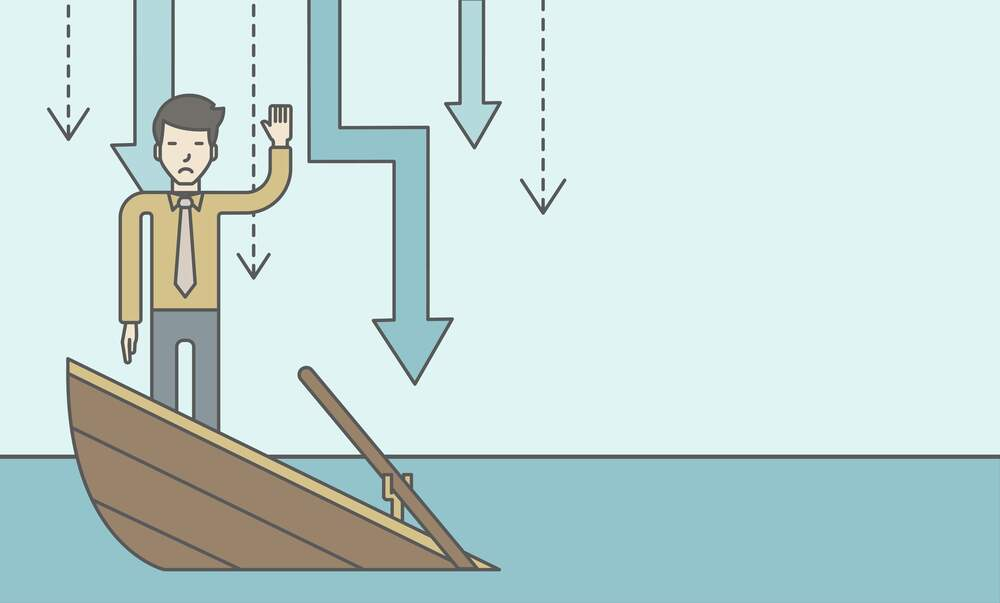

# Código

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# installing scikit-plot
!pip install -q scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV,cross_val_score,KFold,RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,f1_score,recall_score,make_scorer,plot_confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
import scikitplot as sckp
#from sklearn.decomposition import PCA
import pickle
SEED = 7
sns.set_theme(style="white")

In [ ]:
#plt.rcParams['figure.figsize']=30,15

## Inicio

Como primeira parte vamos carregar nossos dados e olhar se existem valores faltantes no mesmo fazendo assim uma breve Analise

In [ ]:
#PATH = '../dados/customer-churn-prediction-2020/'
PATH = 'train.csv'

In [ ]:
data_train = pd.read_csv(PATH) 
data_train.head()

NameError: ignored

In [ ]:
data_train.head()

In [ ]:
data_train.shape[1]

In [ ]:
print("Tamanho do dataset: \n\tlinhas-> {}, colunas->{}".format(data_train.shape[0],data_train.shape[1]))
print("Dados nulus:  {}".format(data_train.isnull().sum().sum()))

In [ ]:
data_train.info()

#### Transformando  os dados object em dados int

In [ ]:
data_train.dtypes

NameError: ignored

Dados a serem modeficados [internacional_plan, voice_mail_plan,churn]

In [ ]:
df_copy = data_train.copy()

In [ ]:
lb = LabelEncoder()

for col in data_train.columns:
    if data_train[col].dtypes == object:
        data_train[col]=lb.fit_transform(data_train[col])

**Explicação:** Na celula acima fazemos um laço por todas as colunas do nosso dataset e verificando o tipo do da coluna </br>
caso seja do tipo object aplicamos o Label encoder (***LabelEncoder : De foorma bem simples glosseira ele codifica 'classes' dando rotulos as mesmas </br> temos uma lista [carro,moto,bicicleta] apos usar o labelencoder vamos ficar com [0,1,2]***) rotulando as classes objetcs

In [ ]:
data_train.dtypes

In [ ]:
sns.pairplot(data_train[['total_day_minutes','total_day_calls','total_day_charge',\
    'total_night_minutes','total_night_calls','total_intl_calls','total_intl_charge','number_customer_service_calls','churn']]\
    ,hue='churn');

In [ ]:
sns.countplot(y='churn', data=data_train);

In [ ]:
churn_1 = data_train.loc[data_train['churn']==1]
churn_0 = data_train.loc[data_train['churn']==0]

In [ ]:
churn_1

In [ ]:
churn_0

In [ ]:
churn_0_amostra = churn_0.sample(n=100, random_state=9)
churn_1_amostra = churn_1.sample(n=100, random_state=9)

In [ ]:
round(churn_0_amostra.mean())

In [ ]:
round(churn_1_amostra.mean())

Vemos algumas médias da nossa amostra , retiramos 200 linhas do nosso dataset onde dividimos, o nosso dataset para 100 linhas o churn positivo e 100 linhas para não churns, para que possamos fazer uma media dos perfis de quem irá deixar a empresa.

Podemos ver que o perfil dos clientes que saem, são clientes mais antigos e que usam mto seu plano.

In [ ]:
cols = ["account_length","total_day_minutes","total_day_calls","total_day_charge","total_night_minutes","total_night_calls","total_eve_minutes","total_eve_calls","total_eve_charge","total_night_charge"]
data_train.groupby(["churn"])[cols].agg([np.mean, np.std, np.min, np.max])

In [ ]:
inter_churn = data_train[((data_train.international_plan==1)&(data_train.churn==1))]
inter_churn.international_plan.sum()

In [ ]:
sem_inter_com_churn = data_train[((data_train.international_plan==0)&(data_train.churn==1))]
len(sem_inter_com_churn.international_plan)

In [ ]:
churn_tem_plano = inter_churn.international_plan.sum()
churn_tem_plano/data_train.shape[0]

In [ ]:
churn_nao_tem_plano=len(sem_inter_com_churn.international_plan)
churn_nao_tem_plano/data_train.shape[0]

In [ ]:
inter_sem_churn = data_train[((data_train.international_plan==1)&(data_train.churn==0))]
inter_sem_churn.international_plan.sum()

In [ ]:
sem_inter_sem_churn = data_train[((data_train.international_plan==0)&(data_train.churn==0))]
len(sem_inter_com_churn.international_plan)

In [ ]:
sem_churn_inter_tem_plano = inter_sem_churn.international_plan.sum()
sem_churn_inter_tem_plano/data_train.shape[0]

In [ ]:
sem_churn_inter_nao_tem_plano = len(sem_inter_com_churn.international_plan)
sem_churn_inter_nao_tem_plano/data_train.shape[0]

In [ ]:
explode =(0.1,0.1)
labels = ['Tem plano internacional','Sem plano internacional']
sizes = [churn_tem_plano,churn_nao_tem_plano]
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(sizes, labels=labels)
ax.set_title("Comparação de cclientes que sairam tem plano internacional ou não")

plt.tight_layout()

In [ ]:
explode =(0.1,0.1)
labels = ['Tem plano internacional','Sem plano internacional']
sizes = [sem_churn_inter_tem_plano,sem_churn_inter_nao_tem_plano]
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(sizes, labels=labels)
ax.set_title("Comparação de clientes que ficaram e  tem plano internacional ou não")

plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="international_plan", hue="churn", data=data_train);
ax.set_title("Comparação de clientes que tem plano internacional ou não");

In [ ]:
pd.crosstab(data_train["churn"], data_train["international_plan"], margins=True)

Percebemos que essa comparação é não é tão para se fazer pois o número de clientes que tem plano internacional é menor que o número de cliente que possuem, mas ainda sim podemos ver que no grupo de clientes que estão deixando a impresa tem maior número de pessoas que tinham o plano internacional.

In [ ]:
data_train.head()

In [ ]:
data_train[['total_day_minutes','total_day_calls','total_day_charge',\
    'total_night_minutes','total_night_calls','total_intl_calls','total_intl_charge','number_customer_service_calls']].describe( )

In [ ]:
fig ,ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=data_train[['total_day_minutes','total_day_calls','total_day_charge',\
    'total_night_minutes','total_night_calls','total_intl_calls','total_intl_charge','number_customer_service_calls']],orient='h' ,palette="Set2")
plt.tight_layout()

Vemos que devido a algumas colunas ter seu valor número mais alto devido a suas caracterias únicas, as 3 ultimas colunas ploatas não ficaram tão legiveis, por isso fizemos o gráfico abaixo

In [ ]:
fig ,ax = plt.subplots(figsize=(20,6))
sns.boxplot(data=data_train[['total_intl_calls','total_intl_charge','number_customer_service_calls']],orient='h', palette="Set2")
plt.tight_layout()

In [ ]:
data_train.total_intl_charge.median()

In [ ]:
for cols in ['total_day_minutes','total_day_calls','total_day_charge','total_night_minutes','total_night_calls','total_intl_calls','total_intl_charge','number_customer_service_calls']:
    print('media da coluna {} : {}'.format(cols,round(data_train[cols].mean(),3)))
    print('mediana da coluna {}: {}'.format(cols,round(data_train[cols].median(),3)))
    print('moda da coluna {}: {}'.format(cols,round(data_train[cols].mode(),3)))
    print('desvio padrão da coluna {}: {}'.format(cols,round(data_train[cols].std(),3)))


In [ ]:
state_com_churn= df_copy['state'].groupby(by=df_copy['churn']=='yes')

In [ ]:
state_com_churn.hist(bins=100);

Vemos que o estado com maior taxa de churn seria NJ(Nova Jérsia)

Exportando o dataser tratado

In [ ]:
data_train.drop(columns=['state','area_code'],inplace=True)

In [ ]:
data_train.to_csv(index=False,path_or_buf='churn_tratado.csv')

## Modelo

In [ ]:
#df_tratado = pd.read_csv('/media/cmatheus/dadosProjetos/portfolio/Churn/dados/churn_tratado.csv')
df_tratado = pd.read_csv('churn_tratado.csv')
df_tratado.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [ ]:
df_tratado.drop(columns=['state','area_code'],inplace=True)

In [ ]:
X = df_tratado.drop(columns=['churn'])
Y = df_tratado.churn

print(" Tamanho do shape X-> {}".format(X.shape))
print(" Tamanho do shape Y-> {}".format(Y.shape))

 Tamanho do shape X-> (4250, 17)
 Tamanho do shape Y-> (4250,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size = 0.3,random_state=SEED)

In [ ]:
print(" Tamanho do shape X_train-> {}".format(X_train.shape))
print(" Tamanho do shape X_val-> {}".format(X_val.shape))
print(" Tamanho do shape y_train-> {}".format(y_train.shape))
print(" Tamanho do shape y_val-> {}".format(y_val.shape))

 Tamanho do shape X_train-> (2975, 17)
 Tamanho do shape X_val-> (1275, 17)
 Tamanho do shape y_train-> (2975,)
 Tamanho do shape y_val-> (1275,)


In [ ]:
svc = SVC()
random_florest = RandomForestClassifier()
reg_logistic = LogisticRegression()
lgbm = LGBMClassifier()
xgb = XGBClassifier()
tree = DecisionTreeClassifier()
ada = AdaBoostClassifier()
gbm = GradientBoostingClassifier()
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier()

### Dados balanceados

In [ ]:
rus = RandomUnderSampler()

In [ ]:
X_train_balanced, y_train_balanced = rus.fit_resample(X_train,y_train)

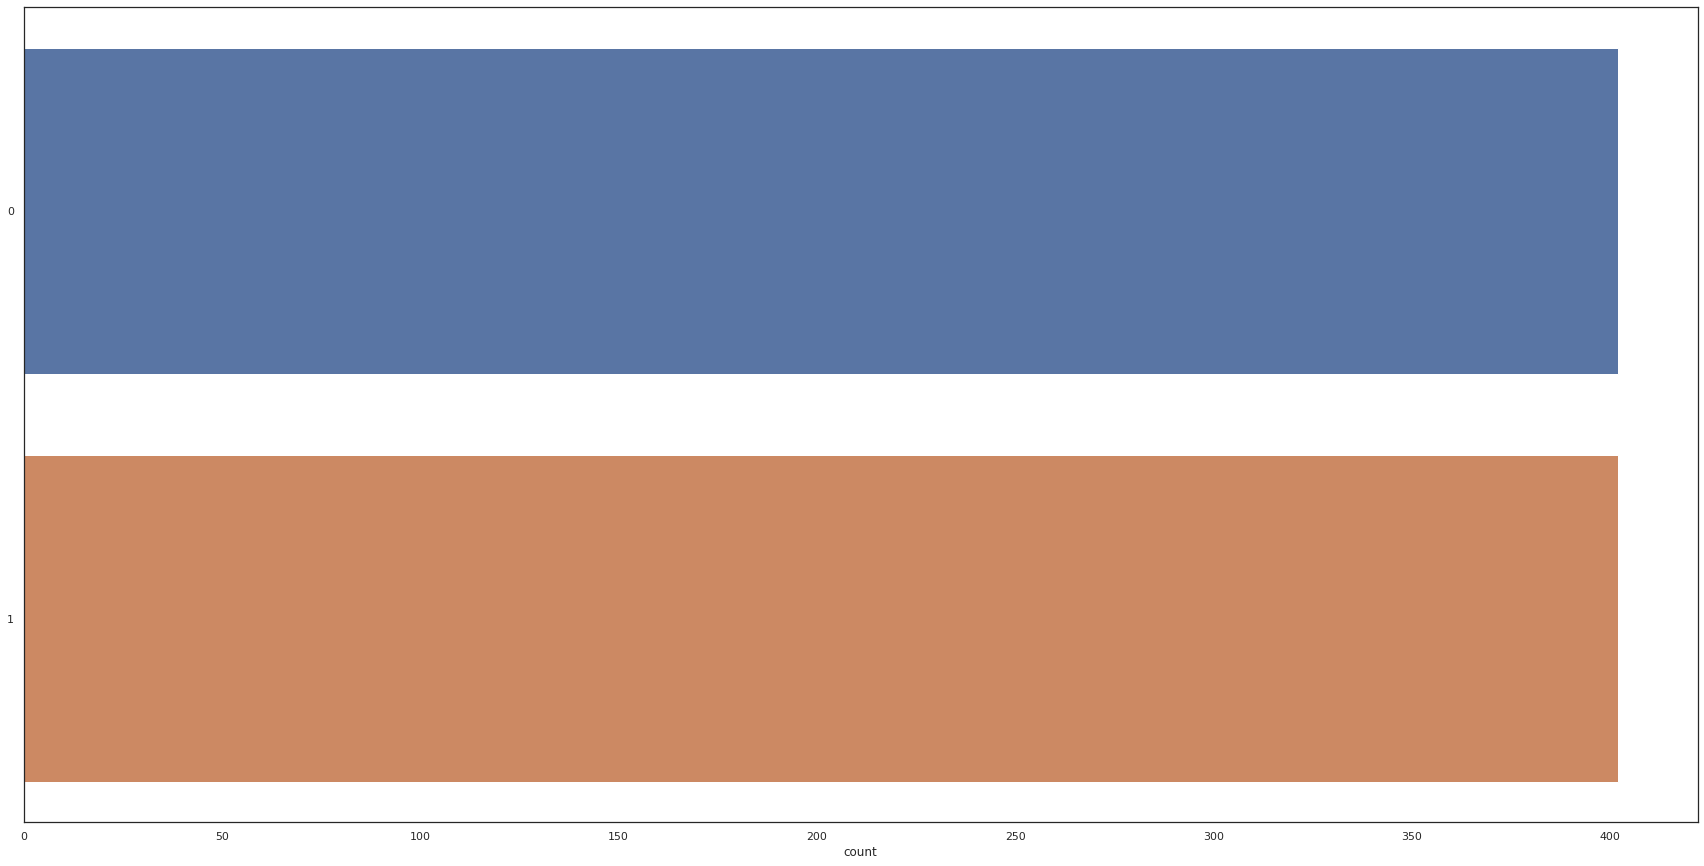

In [ ]:
sns.countplot(y=y_train_balanced);

In [ ]:
kfold = KFold(n_splits=3,random_state= SEED,shuffle=True)

In [ ]:
min_max_sc = MinMaxScaler()
data_scaled = min_max_sc.fit_transform(X_train_balanced)
data_scaled

array([[0.48214286, 1.        , 0.        , ..., 0.15      , 0.39074074,
        0.22222222],
       [0.4375    , 0.        , 0.        , ..., 0.2       , 0.62037037,
        0.        ],
       [0.23660714, 0.        , 0.        , ..., 0.3       , 0.55555556,
        0.        ],
       ...,
       [0.79464286, 0.        , 0.        , ..., 0.2       , 0.52592593,
        0.        ],
       [0.27232143, 0.        , 0.        , ..., 0.1       , 0.65925926,
        0.11111111],
       [0.26785714, 0.        , 0.        , ..., 0.4       , 0.50555556,
        0.11111111]])

In [ ]:
modelos = [svc,reg_logistic,tree,random_florest,xgb,ada,gbm,gnb,knn,lda, lgbm]
nome_modelos = [' SVC','Logistic_Regression','Decision Tree Clf','Random Florest Clf','XGradient Boosting Clf','Ada Boosting Clf','Gradient Boosting Clf','GaussianNB', 'KNN', 'Linear Discriminant Analysis','LigthGBM']

In [ ]:
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    return "Acuracia de {}".format(round(accuracy_score(y_true, y_pred),4))

In [ ]:
X_val_min_max =min_max_sc.fit_transform(X_val)
X_val_min_max

array([[0.59917355, 0.        , 0.        , ..., 0.5       , 0.2027027 ,
        0.44444444],
       [0.37603306, 0.        , 0.        , ..., 0.22222222, 0.56370656,
        0.11111111],
       [0.51239669, 0.        , 0.        , ..., 0.22222222, 0.57335907,
        0.11111111],
       ...,
       [0.2231405 , 0.        , 0.        , ..., 0.11111111, 0.57915058,
        0.        ],
       [0.44628099, 0.        , 0.        , ..., 0.27777778, 0.61969112,
        0.        ],
       [0.16942149, 0.        , 0.        , ..., 0.05555556, 0.44787645,
        0.22222222]])

In [ ]:
acc=[]
recall = []
f1 = []

In [ ]:
print("-"*50)  
for name, model in zip(nome_modelos,modelos):
    print(name)
    for score in ["recall","f1","accuracy"]:
        cvs = cross_val_score(model, data_scaled,y_train_balanced, scoring=score, cv=kfold)
        mean = cvs.mean()
        std = cvs.std()
        print(score + " : "+ str(round(mean,3)) + " std : "+ str(round(std,3)))
        print("Intervalo :  [{:.2f}% ~ {:.2f}%]".format((mean - 2*std)*100, (mean + 2*std)*100))
        print()
        if score is "recall":
            recall.append(round(mean,3))
        elif score is "f1":
            f1.append(round(mean,3))
        else:
            acc.append(round(mean,3))
    print()  

--------------------------------------------------
 SVC
recall : 0.808 std : 0.062
Intervalo :  [68.39% ~ 93.22%]

f1 : 0.796 std : 0.013
Intervalo :  [76.93% ~ 82.21%]

accuracy : 0.794 std : 0.02
Intervalo :  [75.44% ~ 83.27%]


Logistic_Regression
recall : 0.772 std : 0.025
Intervalo :  [72.31% ~ 82.14%]

f1 : 0.755 std : 0.012
Intervalo :  [73.03% ~ 77.98%]

accuracy : 0.75 std : 0.024
Intervalo :  [70.24% ~ 79.76%]


Decision Tree Clf
recall : 0.829 std : 0.031
Intervalo :  [76.76% ~ 89.10%]

f1 : 0.798 std : 0.038
Intervalo :  [72.23% ~ 87.29%]

accuracy : 0.797 std : 0.023
Intervalo :  [75.15% ~ 84.30%]


Random Florest Clf
recall : 0.839 std : 0.041
Intervalo :  [75.69% ~ 92.15%]

f1 : 0.856 std : 0.016
Intervalo :  [82.45% ~ 88.72%]

accuracy : 0.845 std : 0.022
Intervalo :  [79.96% ~ 88.94%]


XGradient Boosting Clf
recall : 0.822 std : 0.038
Intervalo :  [74.55% ~ 89.80%]

f1 : 0.842 std : 0.015
Intervalo :  [81.25% ~ 87.07%]

accuracy : 0.846 std : 0.019
Intervalo :  [80.85

In [ ]:
df_models_train = pd.DataFrame(data=zip(recall,f1,acc), index=nome_modelos, columns=['recall','f1','acc'])
df_models_train

,recall,f1,acc
SVC,0.808,0.796,0.794
Logistic_Regression,0.772,0.755,0.750
Decision Tree Clf,0.829,0.798,0.797
Random Florest Clf,0.839,0.856,0.845
XGradient Boosting Clf,0.822,0.842,0.846
Ada Boosting Clf,0.737,0.746,0.751
Gradient Boosting Clf,0.824,0.841,0.843
GaussianNB,0.790,0.745,0.731
KNN,0.763,0.779,0.785
Linear Discriminant Analysis,0.751,0.736,0.733


**Temos nosso baseline acima,  agora vamos otimizar os melhores algoritmos**

In [ ]:
df_models_train=df_models_train.reset_index()

In [ ]:
df_models_train.rename(columns={'index': 'modelos'}, inplace = True)
df_models_train

,modelos,recall,f1,acc
0,SVC,0.808,0.796,0.794
1,Logistic_Regression,0.772,0.755,0.750
2,Decision Tree Clf,0.829,0.798,0.797
3,Random Florest Clf,0.839,0.856,0.845
4,XGradient Boosting Clf,0.822,0.842,0.846
5,Ada Boosting Clf,0.737,0.746,0.751
6,Gradient Boosting Clf,0.824,0.841,0.843
7,GaussianNB,0.790,0.745,0.731
8,KNN,0.763,0.779,0.785
9,Linear Discriminant Analysis,0.751,0.736,0.733


In [ ]:
df_models_train.sort_values(by=['f1','acc','recall'],ascending=False)

,modelos,recall,f1,acc
3,Random Florest Clf,0.839,0.856,0.845
10,LigthGBM,0.827,0.845,0.850
4,XGradient Boosting Clf,0.822,0.842,0.846
6,Gradient Boosting Clf,0.824,0.841,0.843
2,Decision Tree Clf,0.829,0.798,0.797
0,SVC,0.808,0.796,0.794
8,KNN,0.763,0.779,0.785
1,Logistic_Regression,0.772,0.755,0.750
5,Ada Boosting Clf,0.737,0.746,0.751
7,GaussianNB,0.790,0.745,0.731


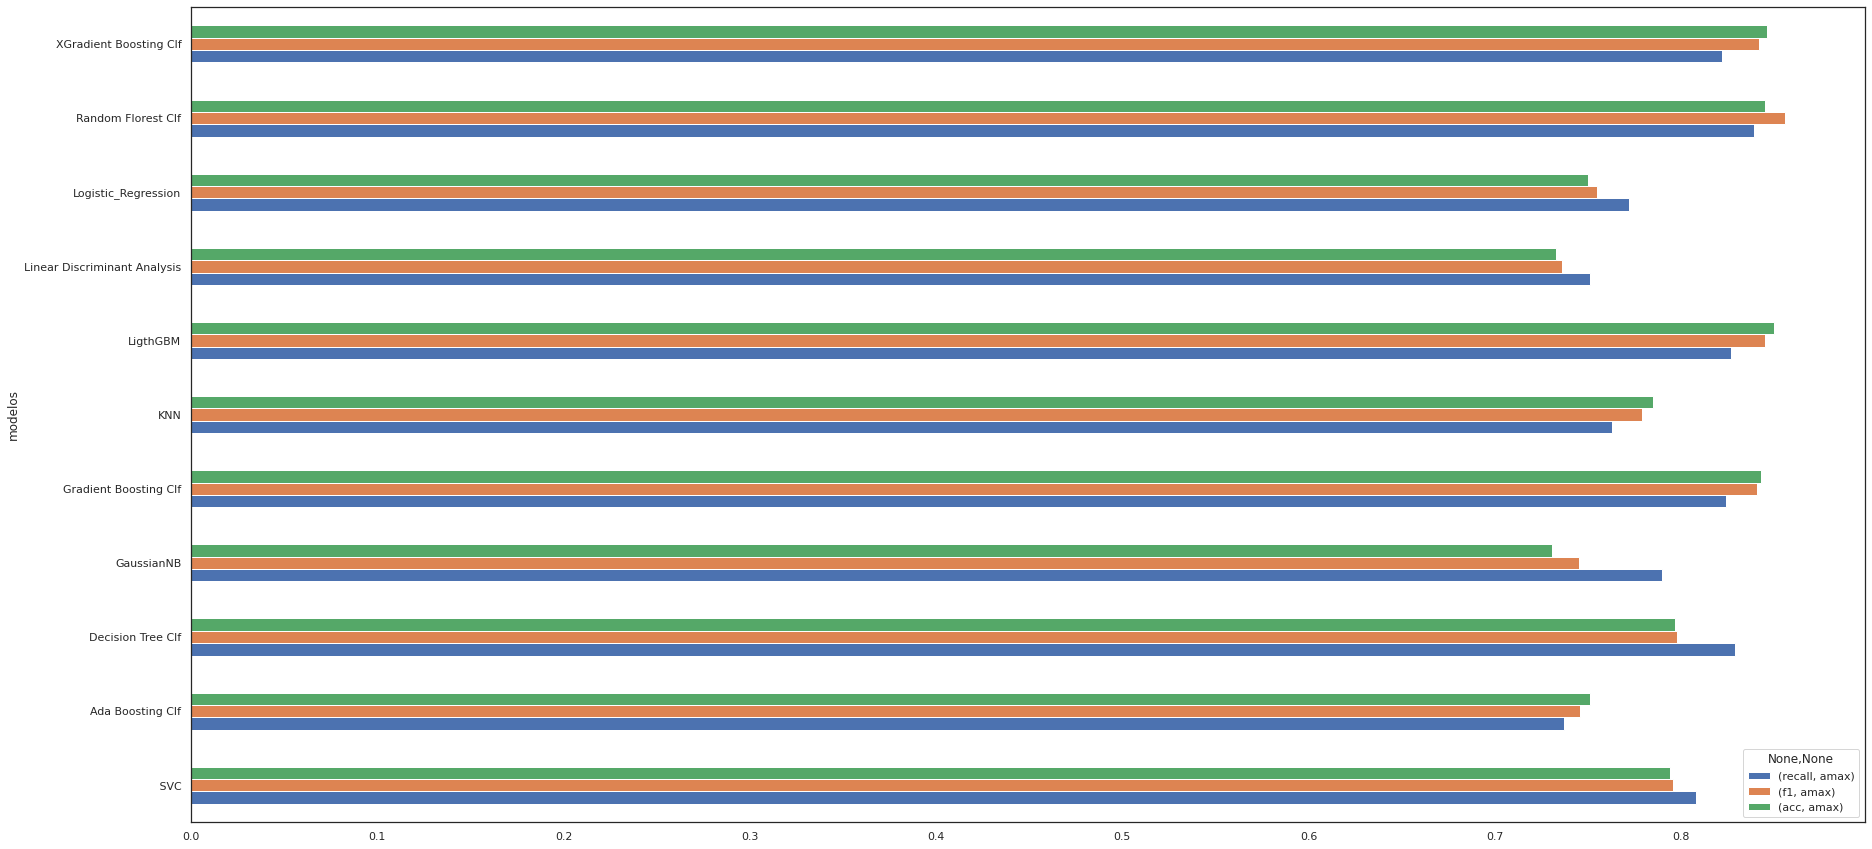

In [ ]:
cols = ["recall","f1","acc"]
df_models_train.groupby(["modelos"])[cols].agg([np.max]).plot(kind='barh');

Com o gráfico de barras acima podemos ver quais modelos iremo trabalhar, são eles:


*   XGradient Boosting 
*   Gradient Boosting
*   LigthGBM
*   Random Florest



### Tunando os modelos

In [ ]:
scorer = ["recall","accuracy","f1"]
def cross_score(data_X,data_Y, kfold,estimator,estimator_name,score=[],export=False):
    recall = []
    acc  = []
    f1 = []
    for sc in score:
        cv = cross_val_score(estimator,data_X,data_Y, scoring=sc, cv=kfold)
        mean = cv.mean()
        std = cv.std()
        print("Array: ")
        print("--------> "+sc + " : [ "+str(cv)+" ]\n")
        print(sc + " : "+ str(round(mean,3)) + " std : "+ str(round(std,3)))
        print("Intervalo :  [{:.2f}% ~ {:.2f}%]".format((mean - 2*std)*100, (mean + 2*std)*100))
        print()
        
        if sc is "recall":
            recall.append(round(mean,3))
        elif sc is "f1":
            f1.append(round(mean,3))
        else:
            acc.append(round(mean,3))
    if export is True:
        df_ = pd.DataFrame(data=zip(recall,f1,acc), index=[estimator_name], columns=['recall','f1','accuracy'])
        return df_
            

#### XGradient Boosting

In [ ]:
param = {
 'max_depth':range(3,15,2),
 'min_child_weight':range(1,10,2),
 'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)],
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

In [ ]:
gridXGB = GridSearchCV(estimator=XGBClassifier(),param_grid=param,cv=kfold,verbose=1)

In [ ]:
gridXGB.fit(data_scaled,y_train_balanced)

Fitting 3 folds for each of 6750 candidates, totalling 20250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 20250 out of 20250 | elapsed: 29.3min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=7, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     rand...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'ma

In [ ]:
gridXGB.best_params_, gridXGB.best_score_

({'colsample_bytree': 0.85,
  'gamma': 0.0,
  'max_depth': 7,
  'min_child_weight': 1,
  'reg_alpha': 0.01,
  'subsample': 0.85},
 0.8768656716417911)

In [ ]:
gridXGB.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.85, verbosity=1)

In [ ]:
xgbBest = gridXGB.best_estimator_

In [ ]:
xgbBest.set_params(**gridXGB.best_params_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.85, verbosity=1)

In [ ]:
cross_score(score=["recall","accuracy","f1"],data_X=data_scaled,data_Y=y_train_balanced,estimator=xgbBest,estimator_name="xgb_best",kfold=kfold)

Array: 
--------> recall : [ [0.87234043 0.84482759 0.8137931 ] ]

recall : 0.844 std : 0.024
Intervalo :  [79.58% ~ 89.15%]

Array: 
--------> accuracy : [ [0.89179104 0.88059701 0.85820896] ]

accuracy : 0.877 std : 0.014
Intervalo :  [84.89% ~ 90.48%]

Array: 
--------> f1 : [ [0.89454545 0.85964912 0.86131387] ]

f1 : 0.872 std : 0.016
Intervalo :  [83.97% ~ 90.40%]



In [ ]:
xgbBest.fit(data_scaled,y_train_balanced)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.85, verbosity=1)

In [ ]:
scorer = ["recall","accuracy","f1"]
df_xgb_best = cross_score(X_val_min_max,y_val,kfold,xgbBest,estimator_name='xgb_best',score=["recall","accuracy","f1"],export=True)


Array: 
--------> recall : [ [0.65625    0.62121212 0.74242424] ]

recall : 0.673 std : 0.051
Intervalo :  [57.14% ~ 77.52%]

Array: 
--------> accuracy : [ [0.92       0.93647059 0.95529412] ]

accuracy : 0.937 std : 0.014
Intervalo :  [90.84% ~ 96.61%]

Array: 
--------> f1 : [ [0.71186441 0.75229358 0.83760684] ]

f1 : 0.767 std : 0.052
Intervalo :  [66.24% ~ 87.21%]



In [ ]:
df_xgb_best

,recall,f1,accuracy
xgb_best,0.673,0.767,0.937


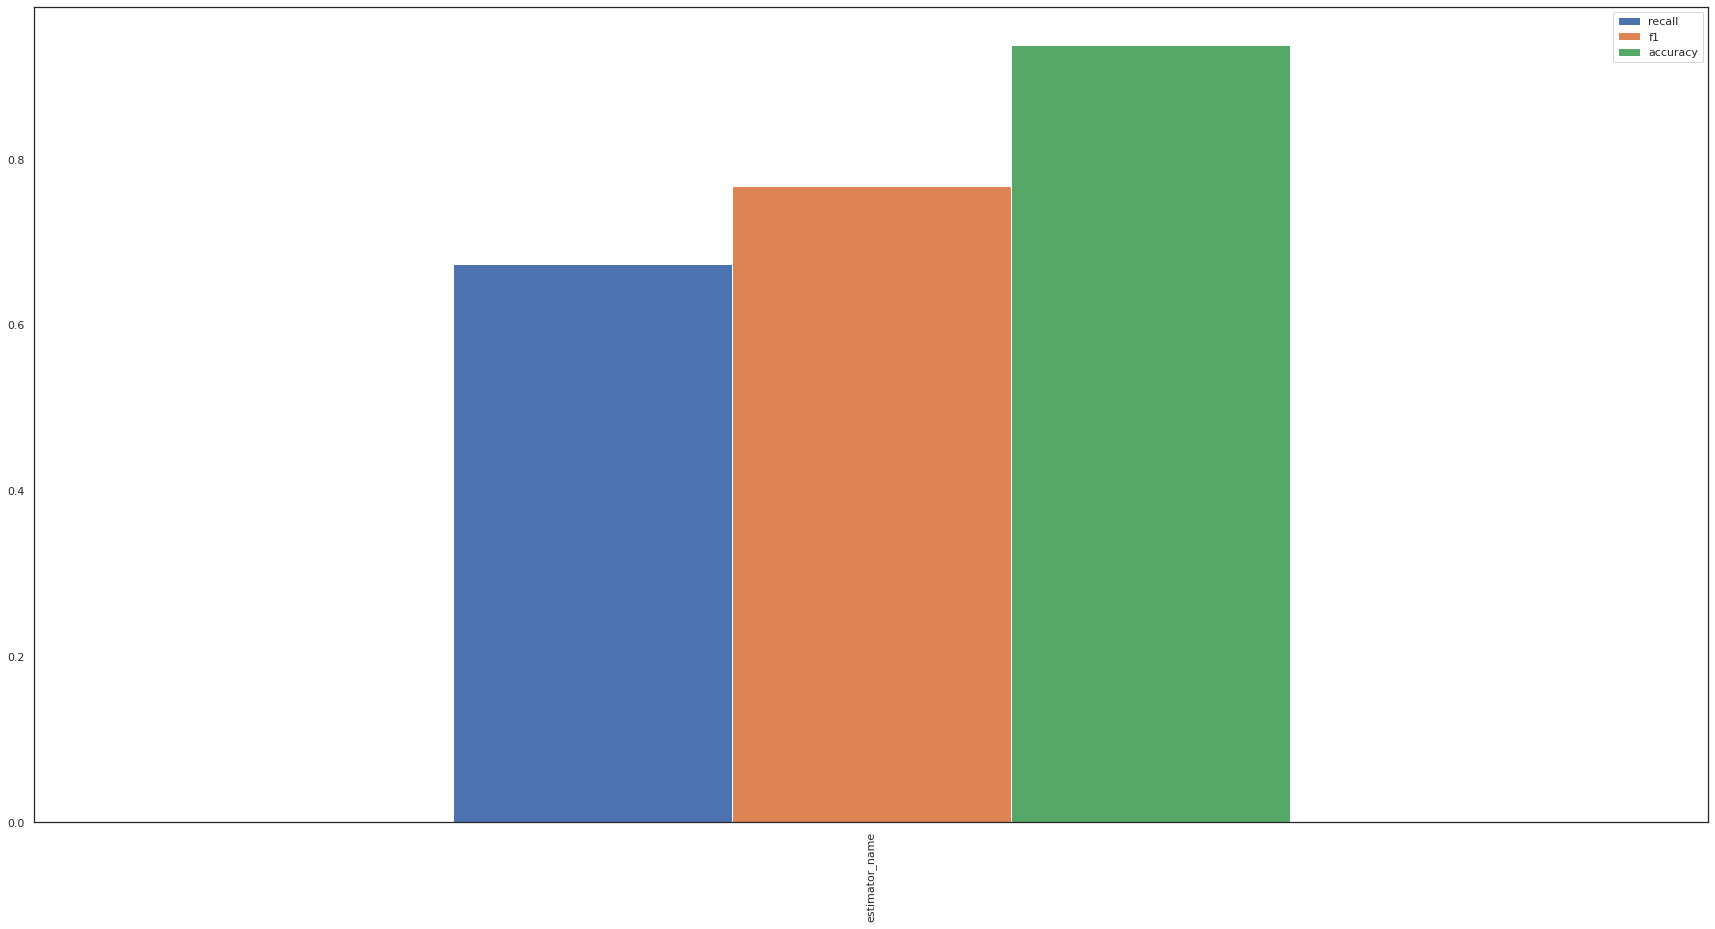

In [ ]:
df_xgb_best.plot(kind='bar')

In [ ]:
feature_importances = pd.DataFrame(xgbBest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

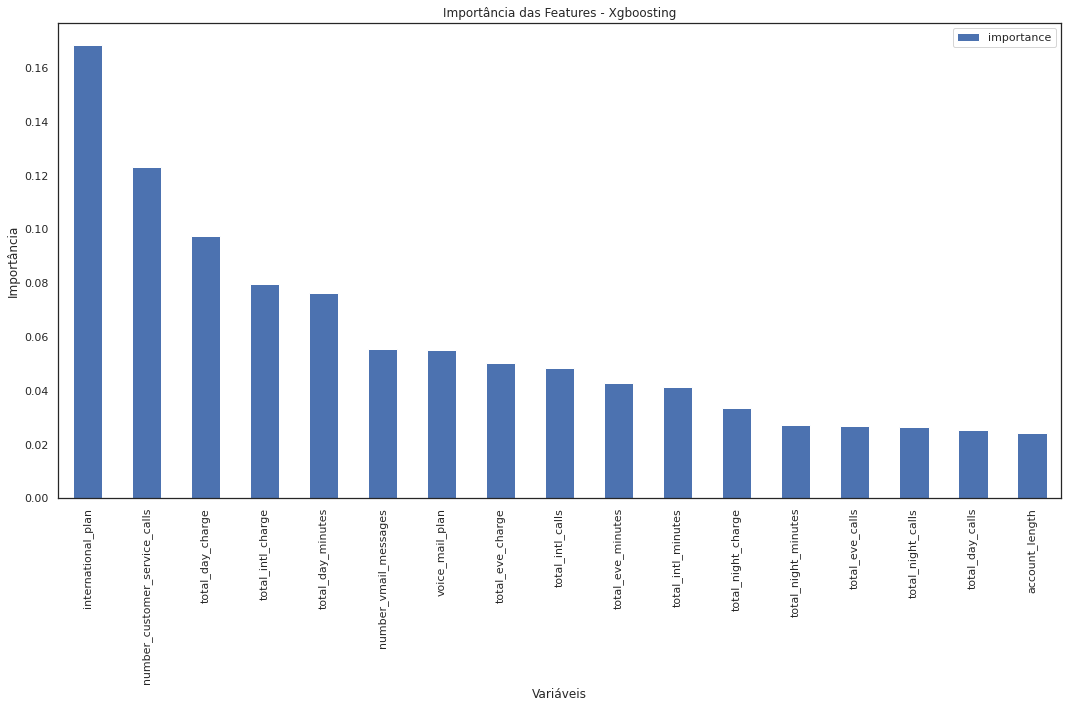

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Importância das Features - Xgboosting")
ax.set_xlabel("Variáveis")
ax.set_ylabel("Importância")


plt.tight_layout()

#### Gradient Boosting

In [ ]:
param = {
    "n_estimators":[5,50,100,200,250,500],
    "max_depth":range(3,15,2),
    "learning_rate":[0.001,0.01,0.1,1,10],
    "min_samples_leaf":range(1,10,3),
    "min_samples_split":range(2,10,2),
    "max_features" :['sqrt', 'log2']
}

In [ ]:
gridGBC = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=param,cv=kfold,verbose=1)

In [ ]:
gridGBC.fit(data_scaled,y_train_balanced)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12960 out of 12960 | elapsed: 85.8min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=7, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fr...
                                                  verbose=0, warm_start=False),
             iid='deprec

In [ ]:
gradient_best = gridGBC.best_estimator_

In [ ]:
gridGBC.best_params_

{'learning_rate': 0.1,
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 50}

In [ ]:
gradient_best.set_params(**gridGBC.best_params_)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=8,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gradient_best.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
cross_score(score=["recall","accuracy","f1"],data_X=data_scaled,data_Y=y_train_balanced,estimator=gradient_best,estimator_name="gradient_best",kfold=kfold)

Array: 
--------> recall : [ [0.87234043 0.84482759 0.77241379] ]

recall : 0.83 std : 0.042
Intervalo :  [74.56% ~ 91.42%]

Array: 
--------> accuracy : [ [0.88432836 0.84701493 0.84701493] ]

accuracy : 0.859 std : 0.018
Intervalo :  [82.43% ~ 89.46%]

Array: 
--------> f1 : [ [0.88732394 0.82758621 0.83754513] ]

f1 : 0.851 std : 0.026
Intervalo :  [79.86% ~ 90.31%]



In [ ]:
gradient_best.fit(data_scaled,y_train_balanced)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=8,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:

df_gradient_best = cross_score(X_val_min_max,y_val,kfold,gradient_best,'gradient_best',score=scorer,export=True)

Array: 
--------> recall : [ [0.65625    0.60606061 0.68181818] ]

recall : 0.648 std : 0.031
Intervalo :  [58.51% ~ 71.10%]

Array: 
--------> accuracy : [ [0.92705882 0.92705882 0.94352941] ]

accuracy : 0.933 std : 0.008
Intervalo :  [91.70% ~ 94.81%]

Array: 
--------> f1 : [ [0.74137931 0.72222222 0.82051282] ]

f1 : 0.761 std : 0.043
Intervalo :  [67.63% ~ 84.65%]



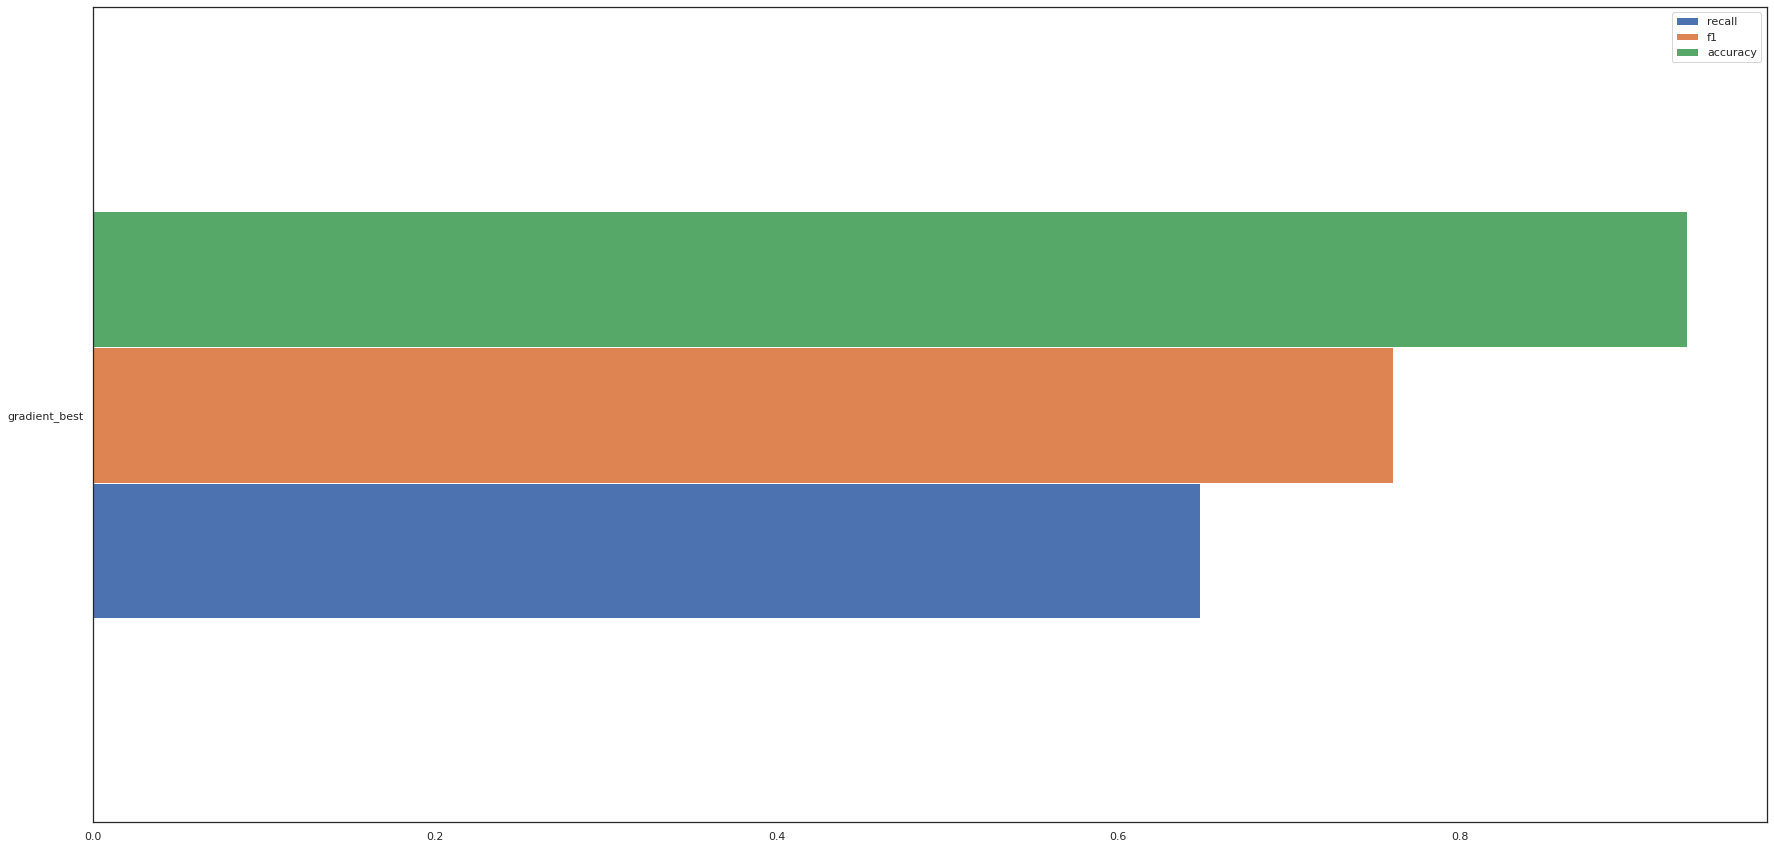

In [ ]:
df_gradient_best.plot(kind='barh')

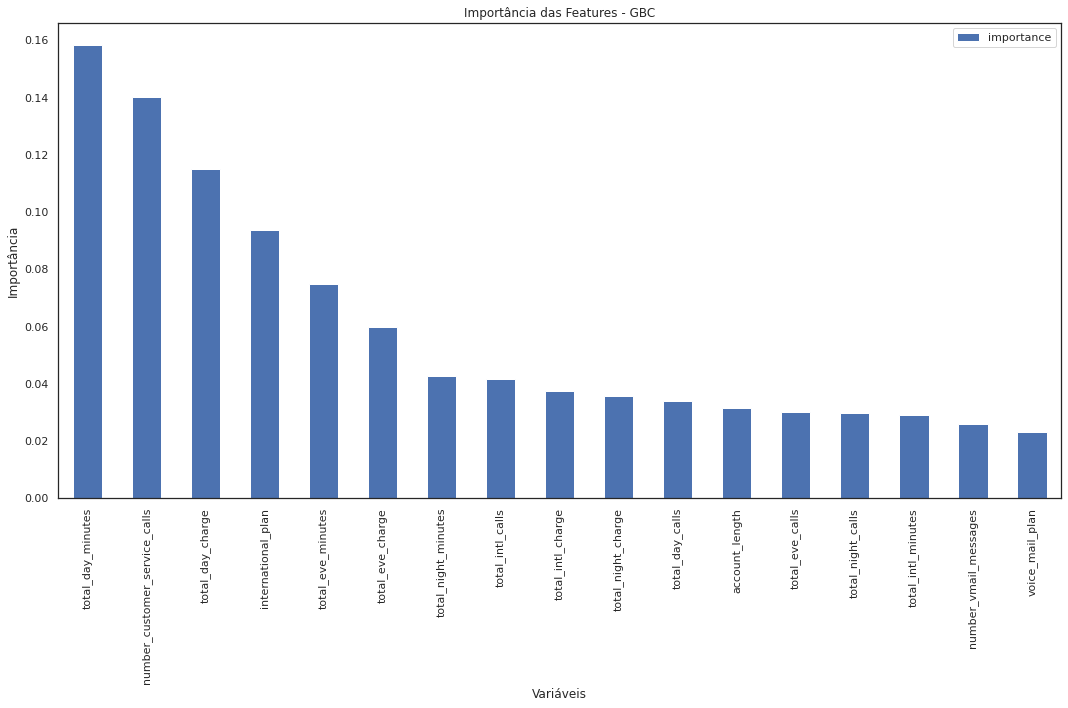

In [ ]:
feature_importances = pd.DataFrame(gradient_best.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)
fig, ax = plt.subplots(figsize=(15,10))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Importância das Features - GBC")
ax.set_xlabel("Variáveis")
ax.set_ylabel("Importância")


plt.tight_layout()

#### LigthGBM

In [ ]:
param = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}


In [ ]:
gridLGBM = GridSearchCV(estimator=LGBMClassifier(),param_grid=param,cv=kfold,verbose=1)

In [ ]:
#gridLGBM.fit(data_scaled,y_train_balanced)
gridLGBM.fit(data_scaled,y_train_balanced)

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8748 out of 8748 | elapsed:  9.5min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=7, shuffle=True),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=...
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'max_depth': [15, 20, 25],
                         'min_split_gain': [0.3, 0.4],
                         'n_estimators': [400, 700, 1000],
                         'num_le

In [ ]:
lgbmBEST = gridLGBM.best_estimator_

In [ ]:
lgbmBEST.set_params(**gridLGBM.best_params_)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
               importance_type='split', learning_rate=0.1, max_depth=15,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=400, n_jobs=-1, num_leaves=50, objective=None,
               random_state=None, reg_alpha=1.1, reg_lambda=1.1, silent=True,
               subsample=0.9, subsample_for_bin=200000, subsample_freq=20)

In [ ]:
cross_score(score=["recall","accuracy","f1"],data_X=data_scaled,data_Y=y_train_balanced,estimator=lgbmBEST,estimator_name="lgbmBEST",kfold=kfold)

Array: 
--------> recall : [ [0.87943262 0.8362069  0.80689655] ]

recall : 0.841 std : 0.03
Intervalo :  [78.13% ~ 90.04%]

Array: 
--------> accuracy : [ [0.86940299 0.87686567 0.83955224] ]

accuracy : 0.862 std : 0.016
Intervalo :  [82.97% ~ 89.42%]

Array: 
--------> f1 : [ [0.87632509 0.85462555 0.84476534] ]

f1 : 0.859 std : 0.013
Intervalo :  [83.22% ~ 88.49%]



In [ ]:
lgbmBEST.fit(data_scaled,y_train_balanced)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
               importance_type='split', learning_rate=0.1, max_depth=15,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=400, n_jobs=-1, num_leaves=50, objective=None,
               random_state=None, reg_alpha=1.1, reg_lambda=1.1, silent=True,
               subsample=0.9, subsample_for_bin=200000, subsample_freq=20)

In [ ]:
df_lgbmBEST = cross_score(X_val_min_max,y_val,kfold,lgbmBEST,'lgbmBEST',score=scorer,export=True)

Array: 
--------> recall : [ [0.640625   0.66666667 0.53030303] ]

recall : 0.613 std : 0.059
Intervalo :  [49.43% ~ 73.07%]

Array: 
--------> accuracy : [ [0.92       0.92941176 0.92235294] ]

accuracy : 0.924 std : 0.004
Intervalo :  [91.59% ~ 93.19%]

Array: 
--------> f1 : [ [0.70689655 0.74576271 0.67961165] ]

f1 : 0.711 std : 0.027
Intervalo :  [65.65% ~ 76.50%]



In [ ]:
df_lgbmBEST

,recall,f1,accuracy
lgbmBEST,0.613,0.711,0.924


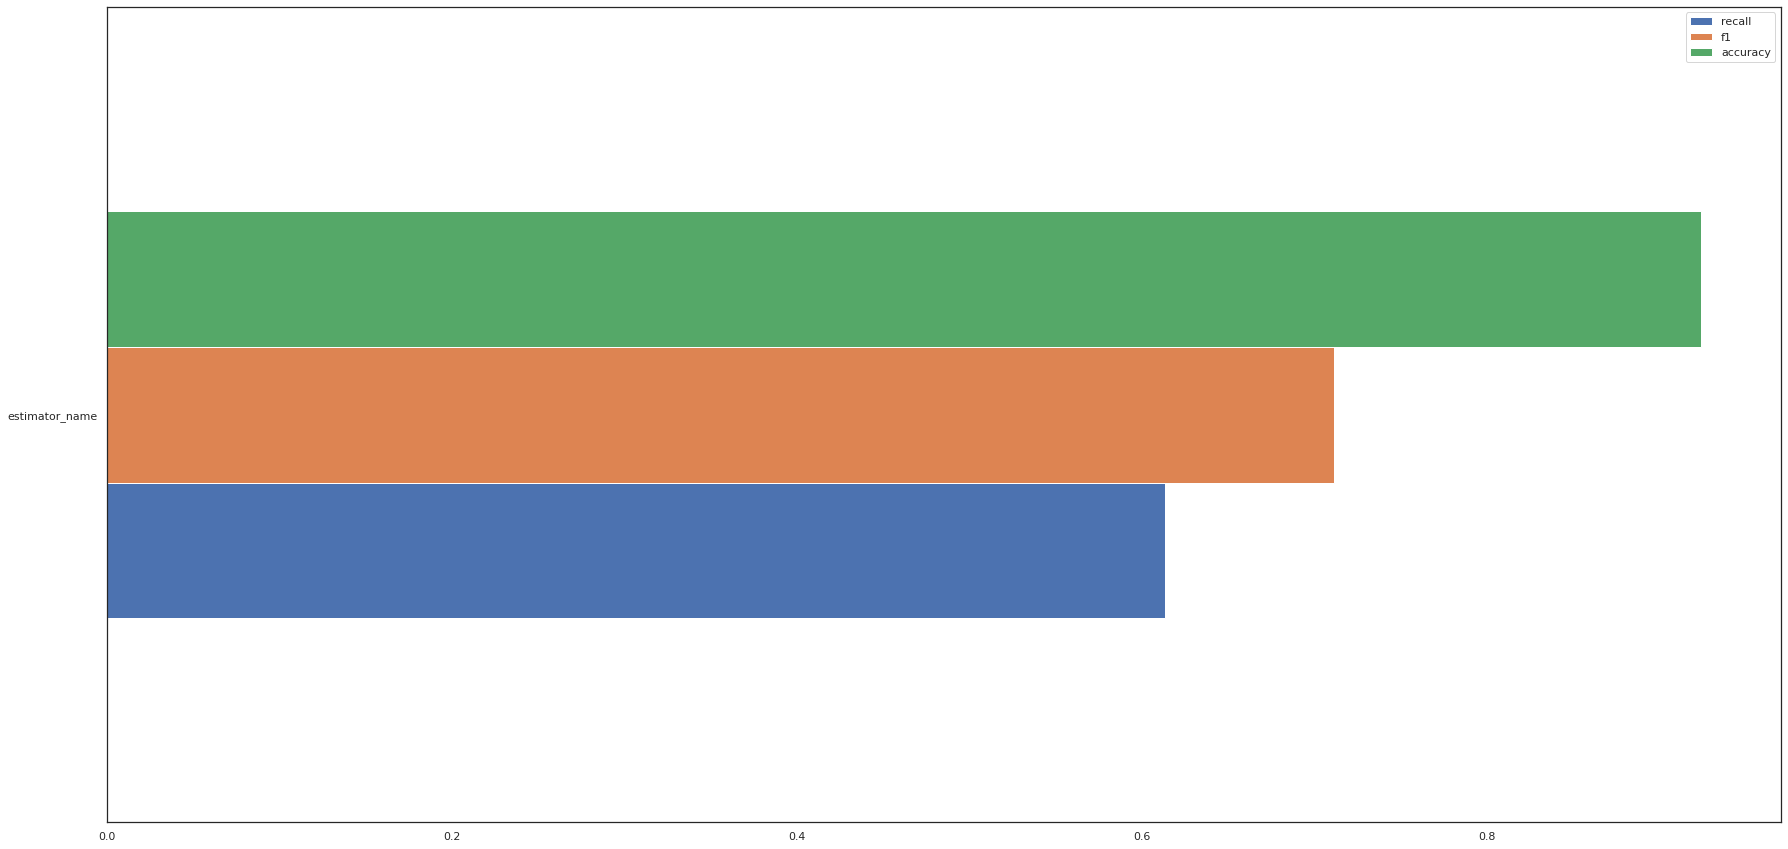

In [ ]:
df_lgbmBEST.plot(kind='barh')

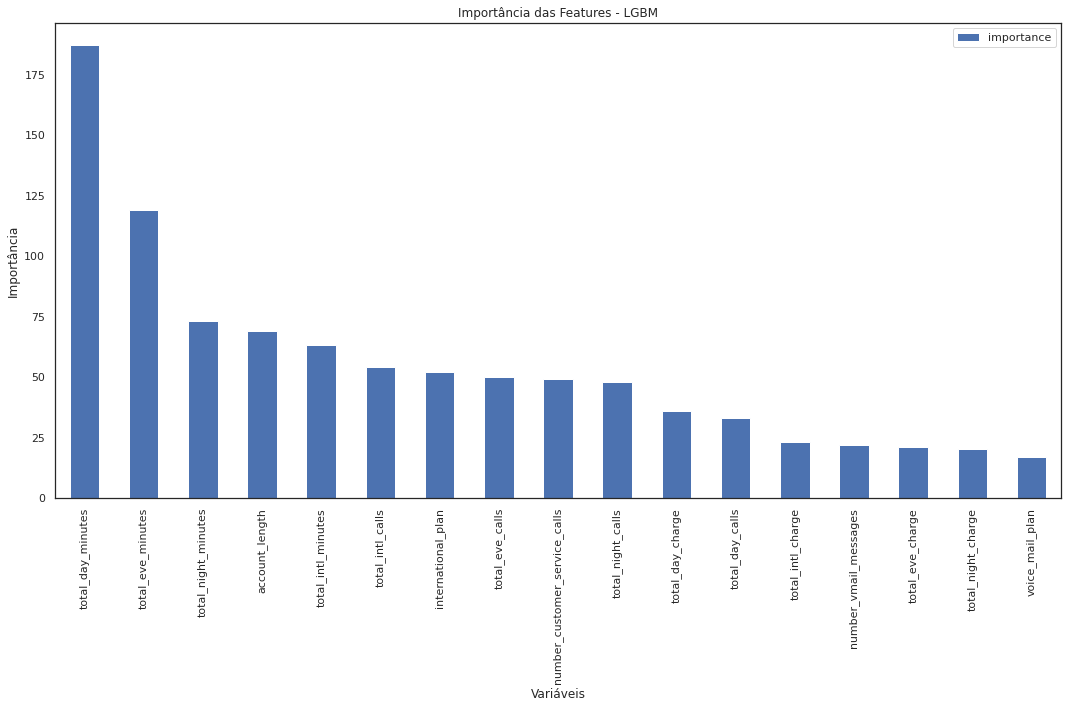

In [ ]:
feature_importances = pd.DataFrame(lgbmBEST.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)
fig, ax = plt.subplots(figsize=(15,10))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Importância das Features - LGBM")
ax.set_xlabel("Variáveis")
ax.set_ylabel("Importância")


plt.tight_layout()

#### Random Florest

In [ ]:
param = {
    'bootstrap': [True, False],
    'max_depth': [2,3,5,10, 20, 30, 50, 70, 90, 100],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 600, 900,  1200, 1400, 1500,2000]
 }

In [ ]:
gridRF = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param,cv=kfold,verbose=1)

In [ ]:
gridRF.fit(data_scaled,y_train_balanced)

Fitting 3 folds for each of 2520 candidates, totalling 7560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7560 out of 7560 | elapsed: 282.5min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=7, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fra...
                                              random_state=None, verbose=0,
                                              warm_start=False),
   

In [ ]:
rf_best = gridRF.best_estimator_

In [ ]:
rf_best.set_params(**gridRF.best_params_)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
cross_score(score=["recall","accuracy","f1"],data_X=data_scaled,data_Y=y_train_balanced,estimator=rf_best,estimator_name="rf_best",kfold=kfold)

Array: 
--------> recall : [ [0.89361702 0.82758621 0.8       ] ]

recall : 0.84 std : 0.039
Intervalo :  [76.18% ~ 91.90%]

Array: 
--------> accuracy : [ [0.88059701 0.86940299 0.85447761] ]

accuracy : 0.868 std : 0.011
Intervalo :  [84.68% ~ 88.96%]

Array: 
--------> f1 : [ [0.88732394 0.84210526 0.85090909] ]

f1 : 0.86 std : 0.02
Intervalo :  [82.10% ~ 89.93%]



In [ ]:
df_rf_best = cross_score(X_val_min_max,y_val,kfold,rf_best,'Random_florest_BEST',score=scorer,export=True)

Array: 
--------> recall : [ [0.671875   0.62121212 0.71212121] ]

recall : 0.668 std : 0.037
Intervalo :  [59.40% ~ 74.28%]

Array: 
--------> accuracy : [ [0.92705882 0.92941176 0.94352941] ]

accuracy : 0.933 std : 0.007
Intervalo :  [91.88% ~ 94.79%]

Array: 
--------> f1 : [ [0.73504274 0.72727273 0.79661017] ]

f1 : 0.753 std : 0.031
Intervalo :  [69.09% ~ 81.50%]



In [ ]:
df_rf_best

,recall,f1,accuracy
Random_florest_BEST,0.668,0.753,0.933


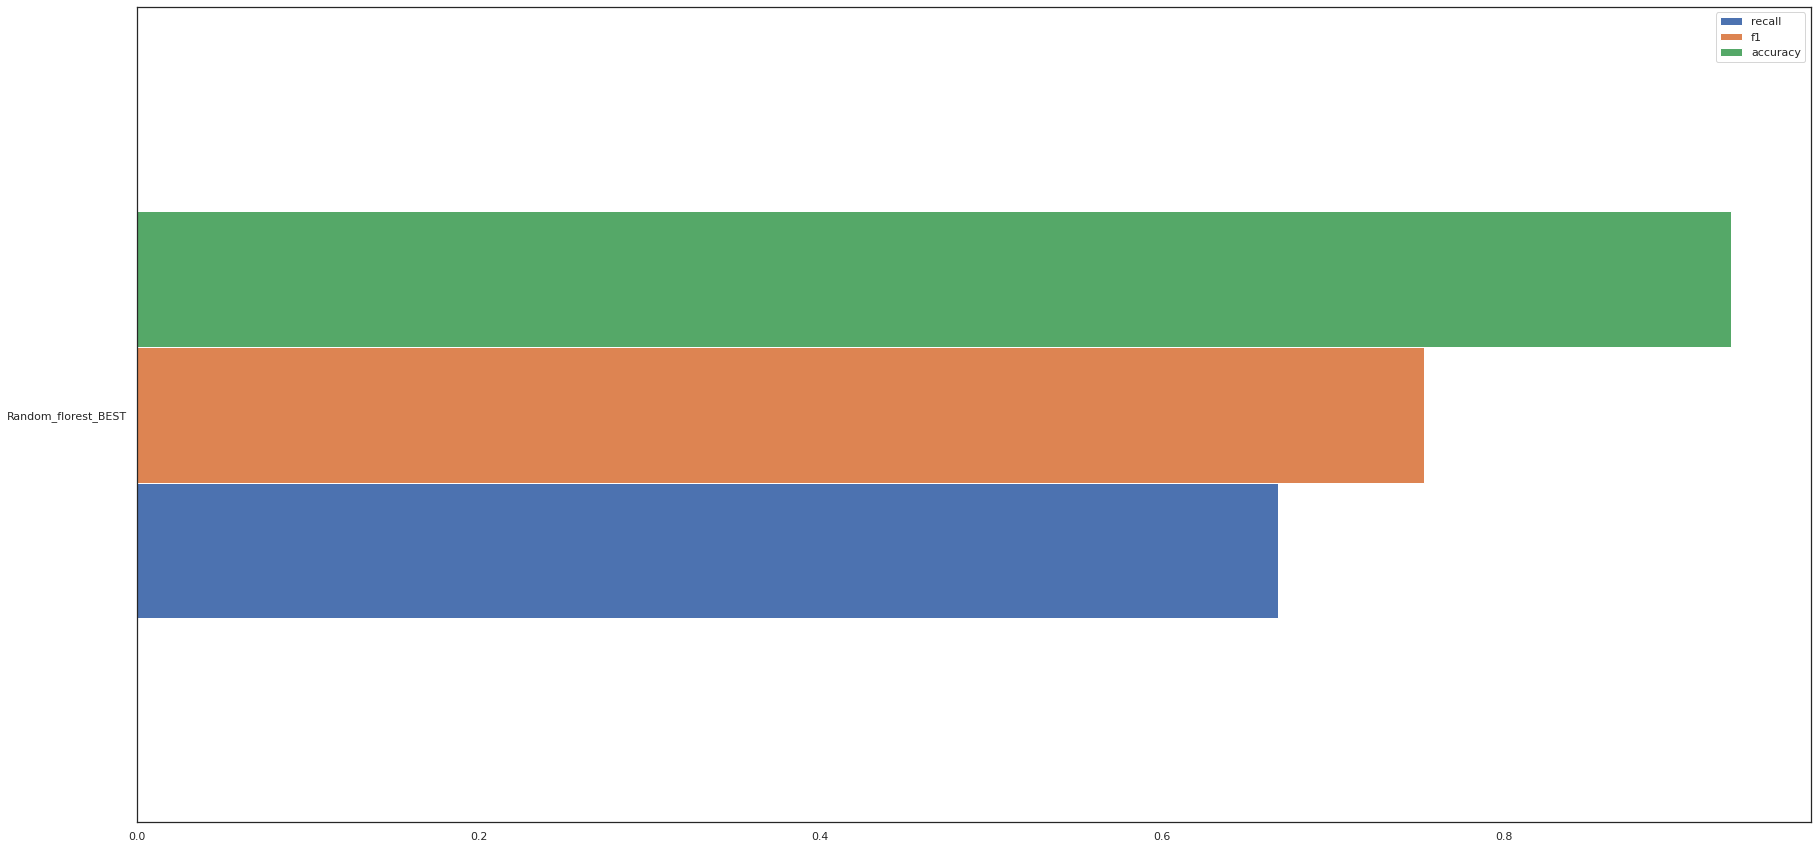

In [ ]:
df_rf_best.plot(kind='barh')

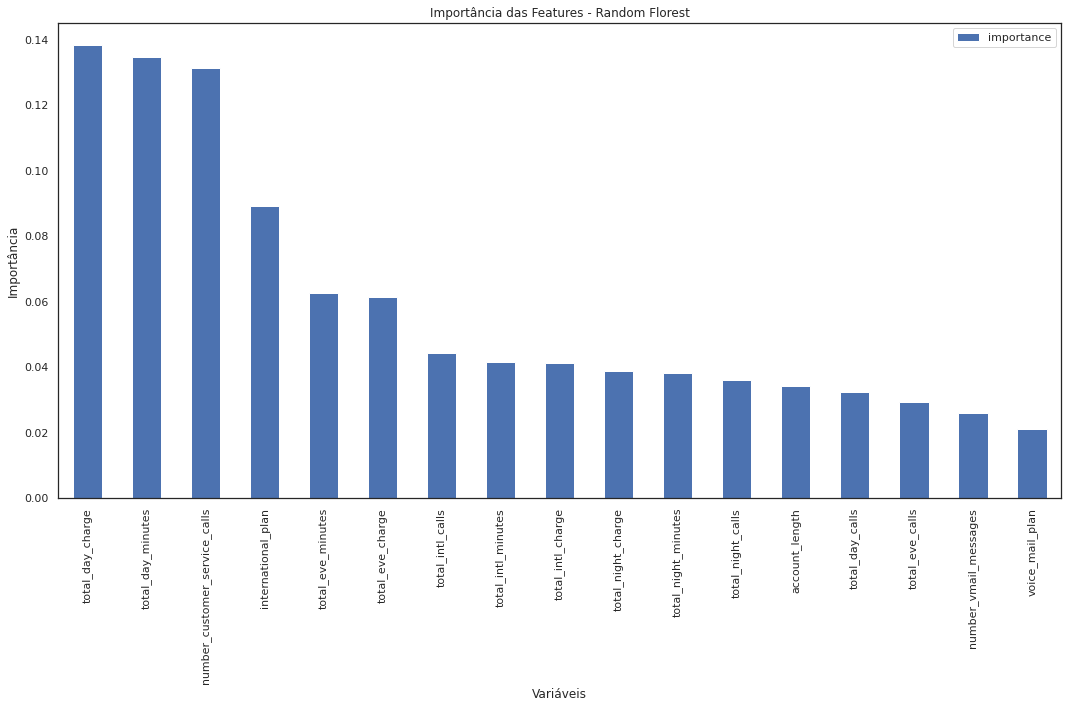

In [ ]:
feature_importances = pd.DataFrame(rf_best.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)
fig, ax = plt.subplots(figsize=(15,10))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Importância das Features - Random Florest")
ax.set_xlabel("Variáveis")
ax.set_ylabel("Importância")


plt.tight_layout()

### Concatenado os DF´s

In [ ]:
df_bests_models= pd.concat([df_xgb_best,df_gradient_best,df_lgbmBEST,df_rf_best])

In [ ]:
df_bests_models = df_bests_models.reset_index()
df_bests_models.rename(columns={'index': 'modelos'}, inplace = True)
#df_bests_models.drop(columns=['level_0'],inplace=True)
df_bests_models

,modelos,recall,f1,accuracy
0,xgb_best,0.673,0.767,0.937
1,gradient_best,0.648,0.761,0.933
2,lgbmBEST,0.613,0.711,0.924
3,Random_florest_BEST,0.668,0.753,0.933


In [ ]:
df_bests_models.sort_values(by=['f1','accuracy','recall'],ascending=False)

,modelos,recall,f1,accuracy
0,xgb_best,0.673,0.767,0.937
1,gradient_best,0.648,0.761,0.933
3,Random_florest_BEST,0.668,0.753,0.933
2,lgbmBEST,0.613,0.711,0.924


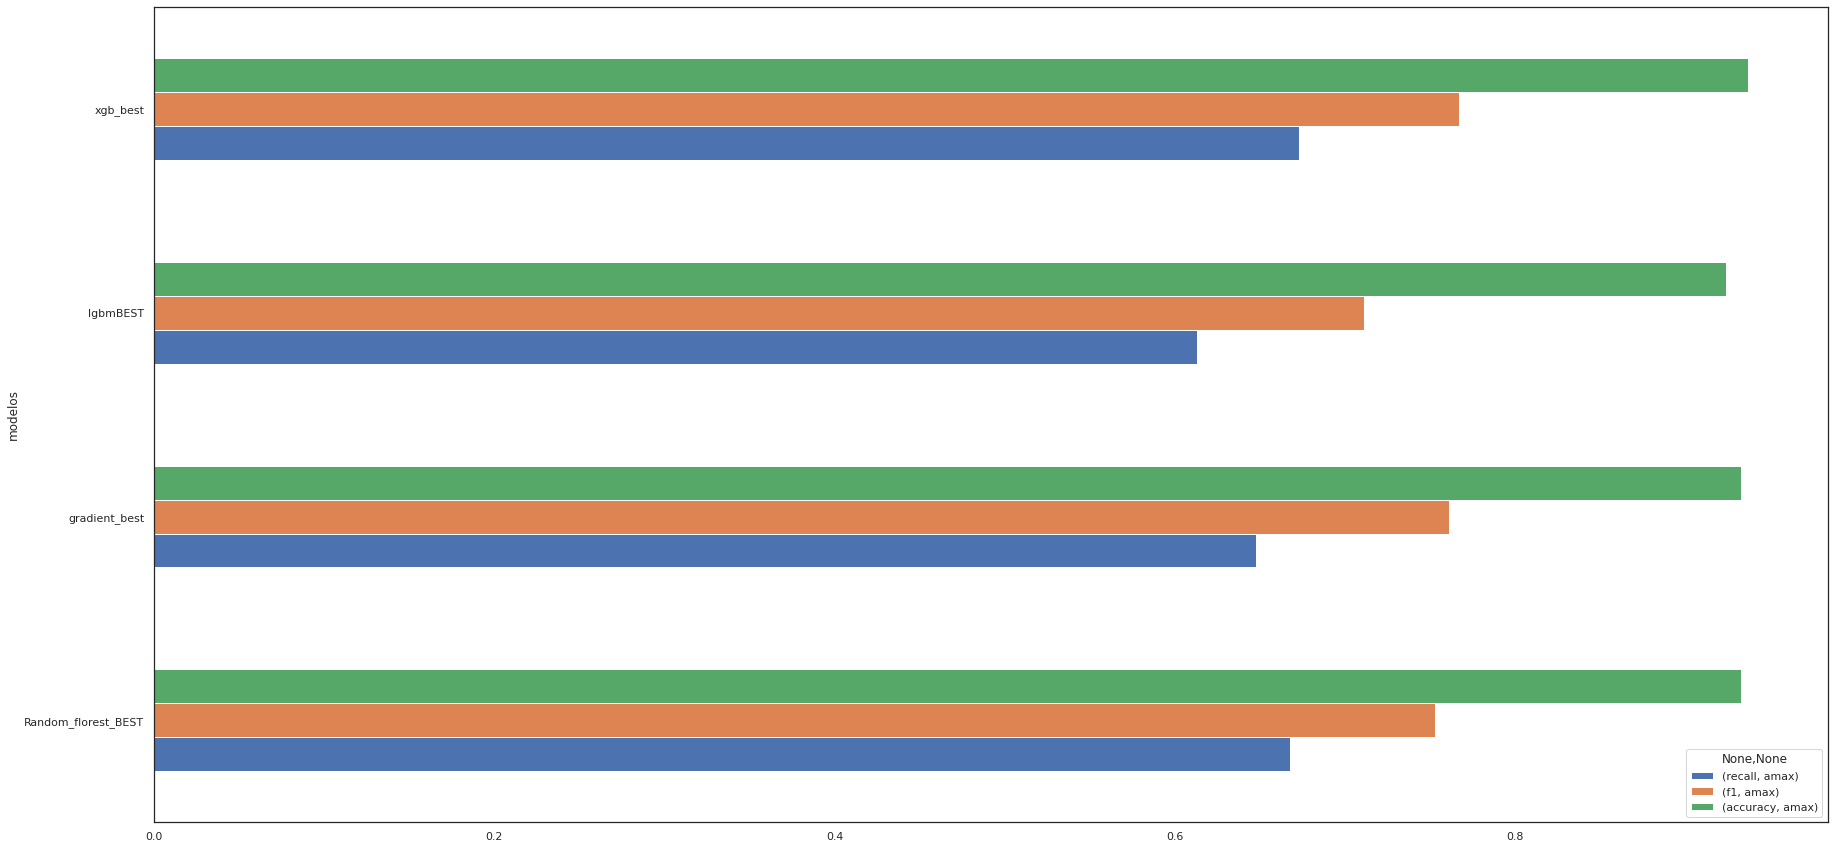

In [ ]:
cols = ['recall','f1','accuracy']
df_bests_models.groupby(["modelos"])[cols].agg([np.max]).plot(kind='barh');

#### Teste

In [ ]:
models_bests = [xgbBest,lgbmBEST,rf_best,gradient_best]
models_bests_name = ['Xboosting','light gradiente boosting','random florest','gradiente boosting']

In [ ]:
y_pred_all = []
for i in models_bests:
    y_pred_all.append(i.predict(X_val_min_max))

In [ ]:
for i,j in zip(models_bests_name,y_pred_all):
    print(i)
    classification_report_with_accuracy_score(y_val,j)
    print()

In [ ]:
for i,j in zip(models_bests_name,y_pred_all):
    #print(i)
    #classification_report_with_accuracy_score(y_val,j)
    sckp.metrics.plot_confusion_matrix(y_val, j,normalize=True, title=i)
    print()


## Exportando o melhor modelo 

In [ ]:
with open('churn_randomFlorest.pkl', 'wb') as file:
    pickle.dump(rf_best, file)

# Conclusão

Portanto ao olhar as análises que fizemos no início podemos ter uma noção do perfil do consumidor que está deixando a empresa esse perfil seria de um cliente mais antigo, logo uma possível solução seria dar mais beneficios para esse cliente mais antigo.

Relacionado ao machine learning o modelo escolhido foi o random florest devido ao seu desempenho nos dados de teste, e apresentar um maior número de acerto dos casos de churn, vizualisados na matriz de confusão.

Agora vamos para proxima etapa que será a construção de uma api para exporta se o churn irá acontecer ou não.